In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout

In [27]:
num_of_prev_times = 5

In [28]:
np.random.seed(1)

In [29]:
df = pd.read_csv('temp.csv', usecols=[1])

df.head()

Daily minimum temperatures
0                        20.7
1                        17.9
2                        18.8
3                        14.6
4                        15.8

In [30]:
df.columns = ['temp']

In [31]:
df.head()

temp
0  20.7
1  17.9
2  18.8
3  14.6
4  15.8

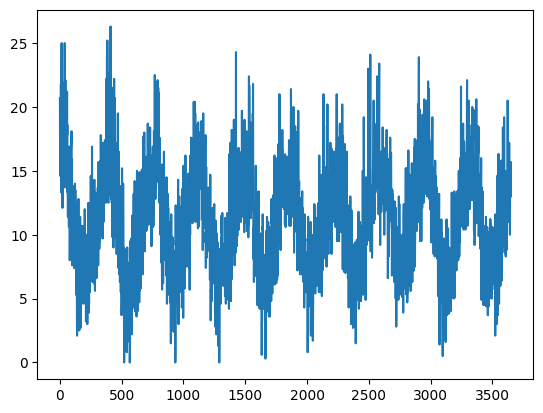

In [32]:
plt.plot(df)
plt.show()

In [33]:
data = df.values
data = data.astype('float32')
print(data)

[[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)
print(data)

[[0.7870723 ]
 [0.6806084 ]
 [0.7148289 ]
 ...
 [0.51330805]
 [0.5969582 ]
 [0.4942966 ]]


In [35]:
train, test = data[0:int(len(data) * 0.7), :], data[int(len(data) * 0.7):len(data), :]

In [36]:
print(train)

[[0.7870723 ]
 [0.6806084 ]
 [0.7148289 ]
 ...
 [0.54372627]
 [0.50570345]
 [0.63498104]]


In [39]:
def change_data(data_set, n=1):
    x, y = [], []
    for i in range(len(data_set) - n - 1):
        a = data_set[i:(i+n), 0]
        x.append(a)
        y.append(data_set[i+n, 0])
    return np.array(x), np.array(y)

In [40]:
train_x, train_y = change_data(train, num_of_prev_times)
test_x, test_y = change_data(test, num_of_prev_times)

In [41]:
print(train_x)

[[0.7870723  0.6806084  0.7148289  0.5551331  0.6007605 ]
 [0.6806084  0.7148289  0.5551331  0.6007605  0.6007605 ]
 [0.7148289  0.5551331  0.6007605  0.6007605  0.6007605 ]
 ...
 [0.4334601  0.42585555 0.4600761  0.48288977 0.61596966]
 [0.42585555 0.4600761  0.48288977 0.61596966 0.53992397]
 [0.4600761  0.48288977 0.61596966 0.53992397 0.54372627]]


In [42]:
print(train_y)

[0.6007605  0.6007605  0.661597   ... 0.53992397 0.54372627 0.50570345]


In [44]:
train_x = np.reshape(train_x, (train_x.shape[0],1,train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0],1,test_x.shape[1]))

In [47]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(1, num_of_prev_times))) ## timestep, feature per timestep
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1))

C:\Users\Admin\keras\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_x, train_y, epochs=10, batch_size=16, verbose=2)

Epoch 1/10
160/160 - 6s - 36ms/step - loss: 0.0370
Epoch 2/10
160/160 - 1s - 4ms/step - loss: 0.0145
Epoch 3/10
160/160 - 1s - 4ms/step - loss: 0.0142
Epoch 4/10
160/160 - 1s - 4ms/step - loss: 0.0127
Epoch 5/10
160/160 - 1s - 4ms/step - loss: 0.0122
Epoch 6/10
160/160 - 1s - 4ms/step - loss: 0.0118
Epoch 7/10
160/160 - 1s - 4ms/step - loss: 0.0118
Epoch 8/10
160/160 - 1s - 4ms/step - loss: 0.0111
Epoch 9/10
160/160 - 1s - 4ms/step - loss: 0.0106
Epoch 10/10
160/160 - 1s - 4ms/step - loss: 0.0109


In [49]:
test_predict = model.predict(test_x)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [50]:
test_predict =scaler.inverse_transform(test_predict)
test_labels = scaler.inverse_transform([test_y])

In [51]:
test_score = mean_squared_error(test_labels[0], test_predict[:,0])

In [52]:
print(test_score)

6.184926598275331


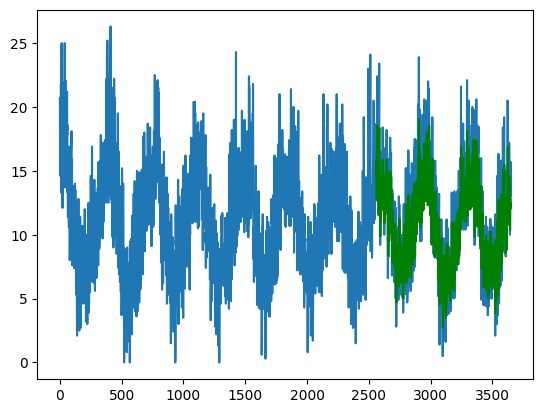

In [53]:
test_predict_plot = np.empty_like(data)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_x)+2*num_of_prev_times+1:len(data)-1,:] = test_predict
plt.plot(scaler.inverse_transform(data))
plt.plot(test_predict_plot, color="green")
plt.show()